<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

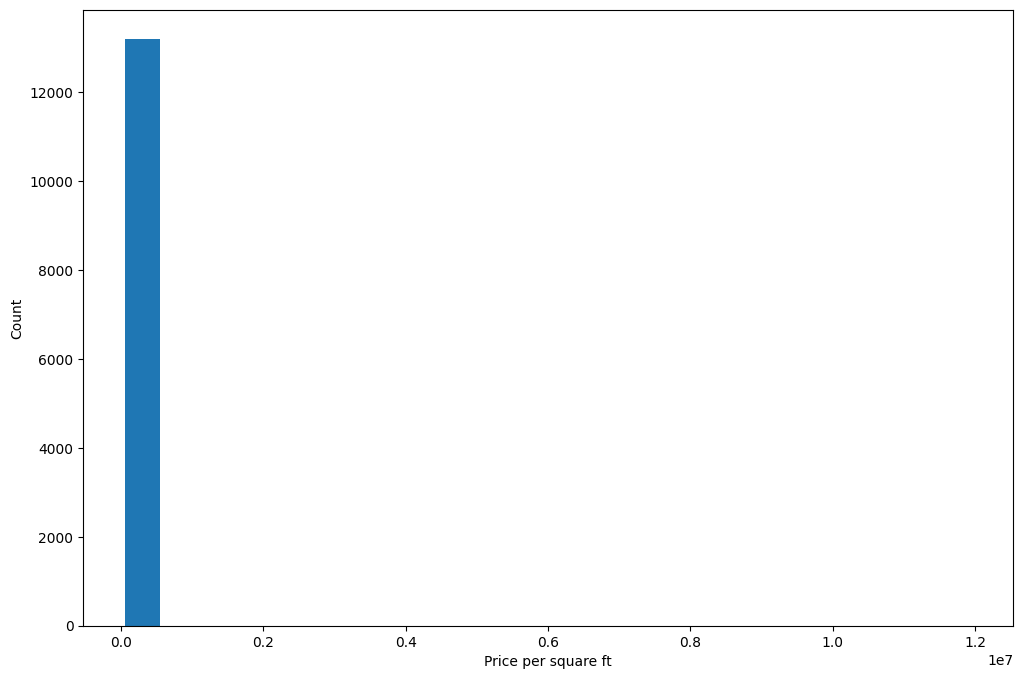

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

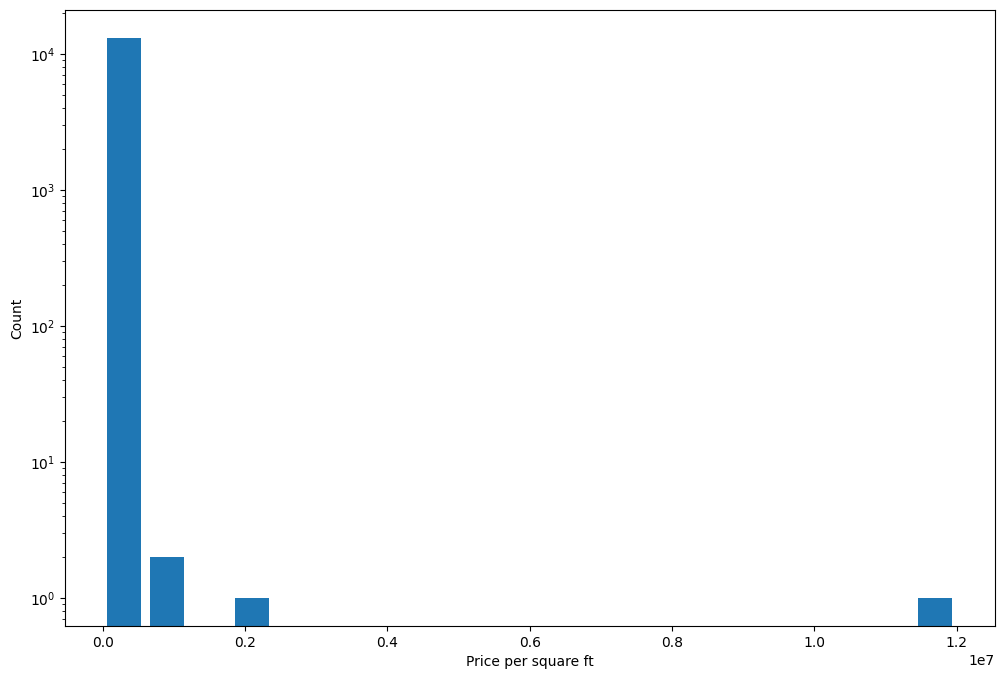

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [7]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7575,other,1 BHK,425.0,1.0,750.0,1,176470
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [8]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [9]:
df.shape

(13200, 7)

In [10]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [11]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [13]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10536,other,4 Bedroom,2400.0,4.0,595.0,4,24791
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
2410,other,6 Bedroom,2400.0,8.0,650.0,6,27083
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333
8454,other,3 Bedroom,7800.0,3.0,2000.0,3,25641
9786,2nd Stage Nagarbhavi,5 Bedroom,1200.0,5.0,290.0,5,24166
3128,Malleshwaram,4 Bedroom,5500.0,5.0,1500.0,4,27272
8083,other,3 BHK,2750.0,3.0,943.0,3,34290


In [14]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [15]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

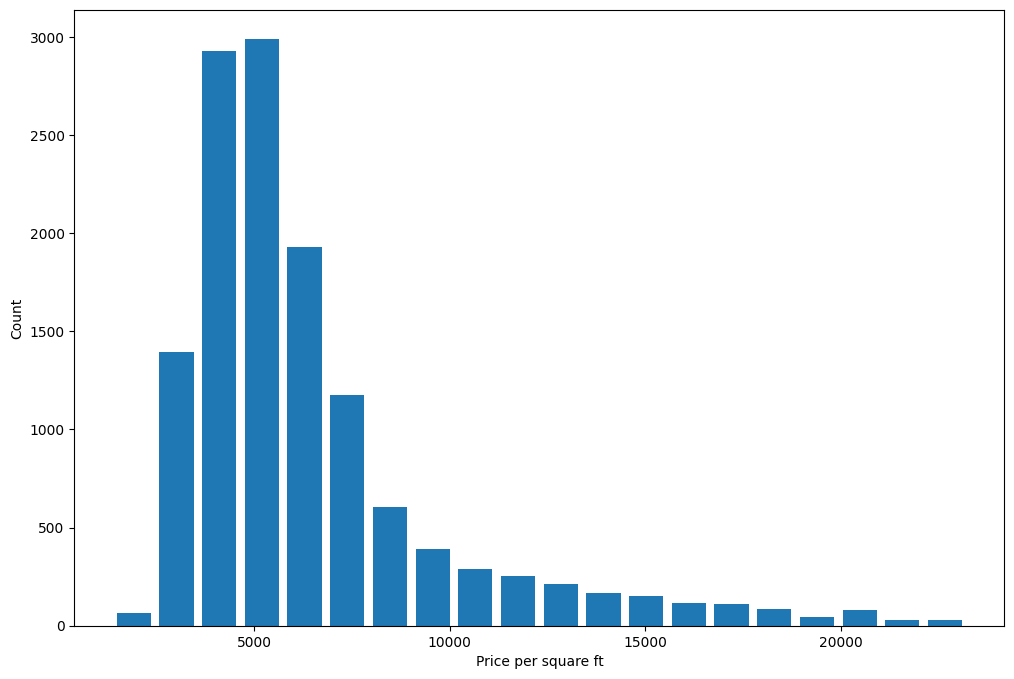

In [16]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

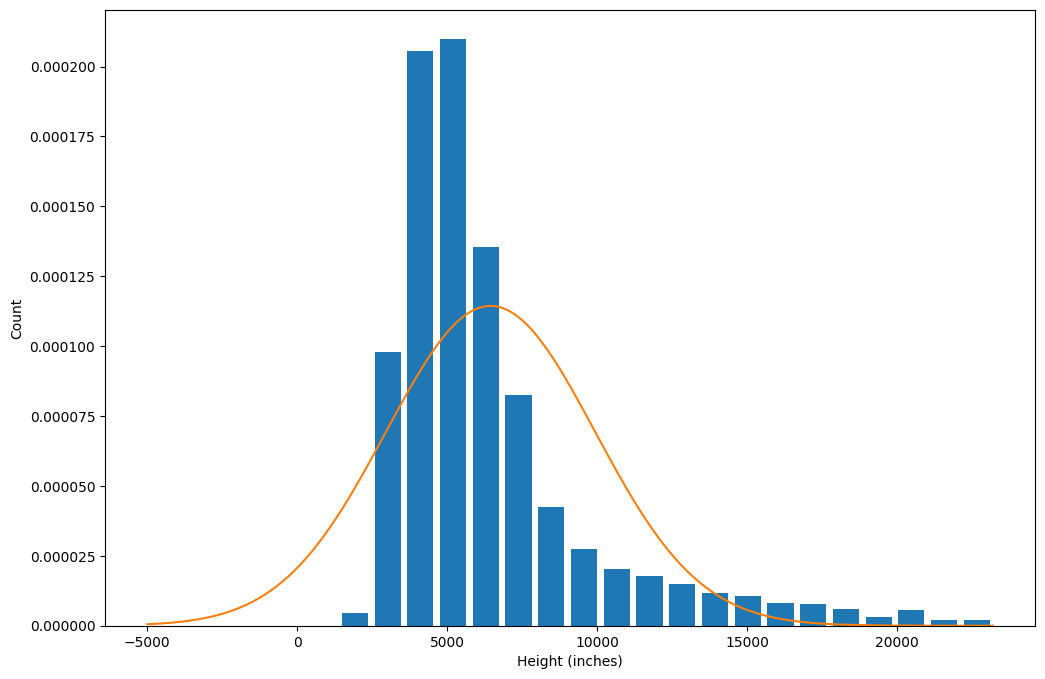

In [17]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [18]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\om\AppData\Local\Temp\ipykernel_8028\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9654,Hosa Road,2 BHK,1360.0,2.0,77.61,2,5706,-0.231260
10018,Sarjapur Road,4 BHK,3005.0,5.0,275.00,4,9151,0.600660
6293,Bhoganhalli,2 BHK,1447.0,2.0,75.97,2,5250,-0.341378
6590,Sarjapur Road,3 BHK,1186.0,2.0,40.00,3,3372,-0.794889
3966,Varthur,2 BHK,1097.0,2.0,33.82,2,3082,-0.864921
6713,Kudlu Gate,3 BHK,1664.0,3.0,68.00,3,4086,-0.622468
3698,Horamavu Banaswadi,2 BHK,1357.0,2.0,54.00,2,3979,-0.648307
8484,Jakkur,3 BHK,1798.0,3.0,110.00,3,6117,-0.132009
10722,Kadugodi,4 BHK,3000.0,4.0,134.00,4,4466,-0.530703
10317,Sarjapur Road,3 BHK,2275.0,4.0,182.00,3,8000,0.322709


In [19]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [20]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500,5.273180
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777,5.098585
7643,other,4 BHK,5422.0,6.0,1900.0,4,35042,6.852983
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333,4.025420


In [21]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [22]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation